# 특성 공학과 규제

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns

import datetime
from datetime import date

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

# 데이터 불러오기

In [3]:
df_stock = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\주식시장_일별__20220415170553.csv", encoding='euc-kr')
df_covid = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\서울특별시 코로나19 자치구별 확진자 발생동향.csv", encoding='euc-kr')
df_vaccine = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\서울특별시 코로나19 백신 예방접종 현황.csv", encoding='euc-kr')

# 데이터 확인

In [4]:
df_stock.head()

,계정별,2020.02.05,2020.02.06,2020.02.07,2020.02.10,2020.02.11,2020.02.12,2020.02.13,2020.02.14,2020.02.17,...,2022.02.04,2022.02.07,2022.02.08,2022.02.09,2022.02.10,2022.02.11,2022.02.14,2022.02.15,2022.02.16,2022.02.17
0,KOSPI지수 (1980.01.04=100),2165.63,2227.94,2211.95,2201.07,2223.12,2238.38,2232.96,2243.59,2242.17,...,2750.26,2745.06,2746.47,2768.85,2771.93,2747.71,2704.48,2676.54,2729.68,2744.09
1,"거래량(주식시장, 잠정치) (만주)",56312.00,68323.00,76671.00,60047.00,51031.00,62342.00,62961.00,58900.00,45309.00,...,52652.00,41008.00,55489.00,52969.00,50043.00,45698.00,60566.00,57535.00,41515.00,60226.00
2,"거래대금(주식시장 , 잠정치) (억원)",74625.00,80636.00,69263.00,53322.00,64744.00,67750.00,79571.00,61331.00,55661.00,...,111842.00,111059.00,116203.00,101579.00,125638.00,105400.00,113138.00,92255.00,82633.00,116773.00
3,"외국인 순매수(주식시장, 잠정치) (억원)",4578.00,1586.00,223.00,-3039.00,-934.00,-2163.00,2795.00,945.00,-2287.00,...,1945.00,-69.00,-939.00,2355.00,8365.00,6081.00,684.00,-2209.00,-437.00,6516.00
4,"주식시장-거래량(만주, 시간외거래분 포함) (만주)",57440.00,69522.00,80034.00,60957.00,52621.00,63246.00,63867.00,59722.00,45825.00,...,53615.00,41784.00,56053.00,53912.00,50961.00,48052.00,61634.00,58904.00,42237.00,-


In [5]:
df_covid.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022.02.17.00,6850,246,6313,221,10242,405,11930,804,15729,...,17646,784,25413,1169,28864,1218,20800,1064,31146,1254
1,2022.02.16.00,6604,227,6092,179,9837,340,11126,639,14865,...,16862,764,24244,1040,27646,1356,19736,1180,29892,898
2,2022.02.15.00,6377,182,5913,136,9497,218,10487,316,14122,...,16098,440,23204,819,26290,682,18556,528,28994,844
3,2022.02.14.00,6195,96,5777,91,9279,256,10171,336,13669,...,15658,386,22385,632,25608,726,18028,588,28150,735
4,2022.02.13.00,6099,184,5686,111,9023,248,9835,408,13192,...,15272,430,21753,747,24882,800,17440,664,27416,728


In [6]:
df_vaccine.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%),추가접종대상자
0,2022.03.18,9401888,807,8314802,88.4,917,8229479,87.5,13602.0,5830011.0,62.0,9401888.0
1,2022.03.17,9401888,459,8313864,88.4,519,8228431,87.5,8497.0,5816025.0,61.9,9401888.0
2,2022.03.16,9401888,372,8313346,88.4,330,8227846,87.5,5556.0,5807312.0,61.8,9401888.0
3,2022.03.15,9401888,383,8313033,88.4,562,8227560,87.5,5754.0,5801689.0,61.7,9401888.0
4,2022.03.14,9401888,637,8312602,88.4,831,8226915,87.5,8779.0,5795463.0,61.6,9401888.0


In [7]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구 기준일  745 non-null    object
 1   종로구 전체   745 non-null    int64 
 2   종로구 추가   745 non-null    int64 
 3   중구 전체    745 non-null    int64 
 4   중구 추가    745 non-null    int64 
 5   용산구 전체   745 non-null    int64 
 6   용산구 추가   745 non-null    int64 
 7   성동구 전체   745 non-null    int64 
 8   성동구 추가   745 non-null    int64 
 9   광진구 전체   745 non-null    int64 
 10  광진구 추가   745 non-null    int64 
 11  동대문구 전체  745 non-null    int64 
 12  동대문구 추가  745 non-null    int64 
 13  중랑구 전체   745 non-null    int64 
 14  중랑구 추가   745 non-null    int64 
 15  성북구 전체   745 non-null    int64 
 16  성북구 추가   745 non-null    int64 
 17  강북구 전체   745 non-null    int64 
 18  강북구 추가   745 non-null    int64 
 19  도봉구 전체   745 non-null    int64 
 20  도봉구 추가   745 non-null    int64 
 21  노원구 전체   745 non-null    int64 
 22  노원

In [8]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Columns: 506 entries, 계정별 to 2022.02.17
dtypes: float64(504), object(2)
memory usage: 43.6+ KB


In [9]:
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         333 non-null    object 
 1   접종대상자       333 non-null    int64  
 2   당일 1차접종자 수  333 non-null    int64  
 3   1차접종 누계     333 non-null    int64  
 4   1차접종률(%)    333 non-null    float64
 5   당일 2차접종자 수  333 non-null    int64  
 6   2차접종 누계     333 non-null    int64  
 7   2차접종률(%)    333 non-null    float64
 8   당일 추가접종자 수  164 non-null    float64
 9   추가접종 누계     158 non-null    float64
 10  추가접종률(%)    142 non-null    float64
 11  추가접종대상자     95 non-null     float64
dtypes: float64(6), int64(5), object(1)
memory usage: 31.3+ KB


# Covid

In [10]:
# 데이터 전처리 - 종로구 데이터 추출
df_covid = df_covid[['자치구 기준일', '종로구 전체']]

In [11]:
# 데이터 전처리 - 날짜 형식 변환
date_set=[]
remove_set = ['2020-04-15', '2020-04-30', '2020-05-01', '2020-05-05', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-09', '2020-12-25', '2020-12-31', '2021-01-01', '2021-02-11', '2021-02-12', '2021-03-01', '2021-05-05', '2021-05-19', '2021-08-16', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-04', '2021-10-11', '2021-12-31', '2022-01-31', '2022-02-01', '2022-02-02']
for item in df_covid['자치구 기준일']:
    break_flag = 1
    # print(item)
    item=item.split('.')
    year=int(item[0])
    month=int(item[1])
    day=int(item[2])
    for remove_data in remove_set:
        if(remove_data == str(date(year, month, day)) or date(year, month, day).weekday() > 4):
            date_set+=[np.nan]
            break_flag = 0
            break
    if(break_flag == 1):
        date_set+=[str(date(year,month,day))]
        # print(datetime.date(year,month,day))
df_covid['자치구 기준일'] = date_set
# df_covid['자치구 기준일'] = pd.to_datetime(df_covid['자치구 기준일'])

df_covid.dropna(axis=0, inplace = True)
df_covid = df_covid.drop_duplicates(['자치구 기준일'])
df_covid["종로구 전체"]=df_covid["종로구 전체"].apply(float)
df_covid = df_covid.sort_values('자치구 기준일', ascending = True)

# print(type(remove_set[0]))
# print(type(str(date(year, month, day))))
# print(str(date(year, month, day)))

# dropna는 행(열) 중 에서 결측치가 존재하는 행(열)을 제거한다.
# axis = 0이면 행을 제거하고 axis = 1이면 열을 제거한다.
# thresh = N 옵션을 주면 해당 행(열)에 N개 이상의 값이 존재하면 결측치가 존재해도 행(열)을 제거하지 않는다.
# inplace = True 옵션을 주면 항구적 적용이 가능하다.

In [12]:
# 확인용 코드
print(len(remove_set))

27


In [13]:
# 확인용 코드
df_covid['자치구 기준일']

744    2020-02-05
743    2020-02-06
742    2020-02-07
739    2020-02-10
738    2020-02-11
          ...    
6      2022-02-11
3      2022-02-14
2      2022-02-15
1      2022-02-16
0      2022-02-17
Name: 자치구 기준일, Length: 505, dtype: object

In [14]:
# 확인용 코드
df_covid.head(3)

,자치구 기준일,종로구 전체
744,2020-02-05,3.0
743,2020-02-06,3.0
742,2020-02-07,0.0


In [15]:
# 확인용 코드
df_covid.tail(3)

,자치구 기준일,종로구 전체
2,2022-02-15,6377.0
1,2022-02-16,6604.0
0,2022-02-17,6850.0


In [16]:
# 확인용 코드
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 744 to 0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  505 non-null    object 
 1   종로구 전체   505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


# Stock

In [17]:
# 확인용 코드
df_stock.head()

,계정별,2020.02.05,2020.02.06,2020.02.07,2020.02.10,2020.02.11,2020.02.12,2020.02.13,2020.02.14,2020.02.17,...,2022.02.04,2022.02.07,2022.02.08,2022.02.09,2022.02.10,2022.02.11,2022.02.14,2022.02.15,2022.02.16,2022.02.17
0,KOSPI지수 (1980.01.04=100),2165.63,2227.94,2211.95,2201.07,2223.12,2238.38,2232.96,2243.59,2242.17,...,2750.26,2745.06,2746.47,2768.85,2771.93,2747.71,2704.48,2676.54,2729.68,2744.09
1,"거래량(주식시장, 잠정치) (만주)",56312.00,68323.00,76671.00,60047.00,51031.00,62342.00,62961.00,58900.00,45309.00,...,52652.00,41008.00,55489.00,52969.00,50043.00,45698.00,60566.00,57535.00,41515.00,60226.00
2,"거래대금(주식시장 , 잠정치) (억원)",74625.00,80636.00,69263.00,53322.00,64744.00,67750.00,79571.00,61331.00,55661.00,...,111842.00,111059.00,116203.00,101579.00,125638.00,105400.00,113138.00,92255.00,82633.00,116773.00
3,"외국인 순매수(주식시장, 잠정치) (억원)",4578.00,1586.00,223.00,-3039.00,-934.00,-2163.00,2795.00,945.00,-2287.00,...,1945.00,-69.00,-939.00,2355.00,8365.00,6081.00,684.00,-2209.00,-437.00,6516.00
4,"주식시장-거래량(만주, 시간외거래분 포함) (만주)",57440.00,69522.00,80034.00,60957.00,52621.00,63246.00,63867.00,59722.00,45825.00,...,53615.00,41784.00,56053.00,53912.00,50961.00,48052.00,61634.00,58904.00,42237.00,-


In [18]:
# 데이터 전처리 - 전치 + 날짜 형식 변환
df_stock_day = df_stock.columns.values.tolist()
df_stock = df_stock.T
# print(df_stock.T.head())
df_stock['날짜'] = df_stock_day

In [19]:
date_set=[]
for item in df_stock['날짜']:
    # print(item)
    if(item == '계정별'):
        date_set+=[np.nan]
    else:
        item=item.split('.')
        year=int(item[0])
        month=int(item[1])
        day=int(item[2])
        date_set+=[str(date(year,month,day))]
    # print(datetime.date(year,month,day))
df_stock['날짜'] = date_set
# df_stock['날짜'] = pd.to_datetime(df_stock['날짜'])

df_stock.dropna(axis=0, inplace = True)
df_stock.rename(columns={0:'KOSPI'}, inplace = True)
df_stock = df_stock[['KOSPI', '날짜']]
df_stock["KOSPI"]=df_stock["KOSPI"].apply(float)
df_stock = df_stock.sort_values('날짜', ascending = True)

In [20]:
# 확인용 코드
df_stock.head(3)

,KOSPI,날짜
2020.02.05,2165.63,2020-02-05
2020.02.06,2227.94,2020-02-06
2020.02.07,2211.95,2020-02-07


In [21]:
# 확인용 코드
df_stock.tail(3)

,KOSPI,날짜
2022.02.15,2676.54,2022-02-15
2022.02.16,2729.68,2022-02-16
2022.02.17,2744.09,2022-02-17


# Vaccine

In [22]:
# 확인용 코드
df_vaccine.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%),추가접종대상자
0,2022.03.18,9401888,807,8314802,88.4,917,8229479,87.5,13602.0,5830011.0,62.0,9401888.0
1,2022.03.17,9401888,459,8313864,88.4,519,8228431,87.5,8497.0,5816025.0,61.9,9401888.0
2,2022.03.16,9401888,372,8313346,88.4,330,8227846,87.5,5556.0,5807312.0,61.8,9401888.0
3,2022.03.15,9401888,383,8313033,88.4,562,8227560,87.5,5754.0,5801689.0,61.7,9401888.0
4,2022.03.14,9401888,637,8312602,88.4,831,8226915,87.5,8779.0,5795463.0,61.6,9401888.0


In [23]:
# 데이터 전처리 - 필요한 열 추출
df_vaccine = df_vaccine[['접종일', '당일 1차접종자 수', '1차접종 누계', '당일 2차접종자 수', '2차접종 누계', '당일 추가접종자 수', '추가접종 누계']]
df_vaccine = df_vaccine.fillna(0)

In [24]:
# 데이터 전처리 - 날짜 형식 변환
date_set=[]
for item in df_vaccine['접종일']:
    # print(item)
    item=item.split('.')
    year=int(item[0])
    month=int(item[1])
    day=int(item[2])

    date_set+=[str(date(year,month,day))]
    # print(datetime.date(year,month,day))
df_vaccine['접종일'] = date_set
# df_covid['자치구 기준일'] = pd.to_datetime(df_covid['자치구 기준일'])

df_vaccine.dropna(axis=0, inplace = True)

In [25]:
# 확인용 코드
df_vaccine.head(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,2022-03-18,807,8314802,917,8229479,13602.0,5830011.0
1,2022-03-17,459,8313864,519,8228431,8497.0,5816025.0
2,2022-03-16,372,8313346,330,8227846,5556.0,5807312.0


In [26]:
# 확인용 코드
df_vaccine.tail(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
330,2021-04-23,10195,345764,119,18376,0.0,0.0
331,2021-04-22,27074,317386,2479,15901,0.0,0.0
332,2021-04-21,22501,291857,2358,13543,0.0,0.0


In [27]:
# 다른 데이터와 날짜 맞추기 위해 평일 날짜 생성 + 자료형 변환
df_hole_day = pd.DataFrame(pd.date_range('20200205', datetime.date(2021,4,20), freq='B'))
df_hole_day.columns=['접종일']
df_hole_day = df_hole_day.astype({'접종일':'str'})
df_hole_day["당일 1차접종자 수"] = 0
df_hole_day["1차접종 누계"] = 0
df_hole_day["당일 2차접종자 수"] = 0
df_hole_day["2차접종 누계"] = 0
df_hole_day["당일 추가접종자 수"] = 0
df_hole_day["추가접종 누계"] = 0

In [28]:
# 확인용 코드
df_hole_day

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,2020-02-05,0,0,0,0,0,0
1,2020-02-06,0,0,0,0,0,0
2,2020-02-07,0,0,0,0,0,0
3,2020-02-10,0,0,0,0,0,0
4,2020-02-11,0,0,0,0,0,0
...,...,...,...,...,...,...,...
310,2021-04-14,0,0,0,0,0,0
311,2021-04-15,0,0,0,0,0,0
312,2021-04-16,0,0,0,0,0,0
313,2021-04-19,0,0,0,0,0,0


In [29]:
# 데이터 합병
df_hole_day
df_vaccine = pd.concat([df_vaccine, df_hole_day])

In [30]:
# 확인용 코드
df_vaccine.head(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,2022-03-18,807,8314802,917,8229479,13602.0,5830011.0
1,2022-03-17,459,8313864,519,8228431,8497.0,5816025.0
2,2022-03-16,372,8313346,330,8227846,5556.0,5807312.0


In [31]:
# 확인용 코드
df_vaccine.tail(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
312,2021-04-16,0,0,0,0,0.0,0.0
313,2021-04-19,0,0,0,0,0.0,0.0
314,2021-04-20,0,0,0,0,0.0,0.0


In [32]:
# 확인용 코드
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 314
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         648 non-null    object 
 1   당일 1차접종자 수  648 non-null    int64  
 2   1차접종 누계     648 non-null    int64  
 3   당일 2차접종자 수  648 non-null    int64  
 4   2차접종 누계     648 non-null    int64  
 5   당일 추가접종자 수  648 non-null    float64
 6   추가접종 누계     648 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 40.5+ KB


In [33]:
# 데이터 전처리 - 날짜 형식 변환
remove_set = ['2020-04-15', '2020-04-30', '2020-05-01', '2020-05-05', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-09', '2020-12-25', '2020-12-31', '2021-01-01', '2021-02-11', '2021-02-12', '2021-03-01', '2021-05-05', '2021-05-19', '2021-08-16', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-04', '2021-10-11', '2021-12-31', '2022-01-31', '2022-02-01', '2022-02-02']
date_set=[]
for item in df_vaccine['접종일']:
    # print(item)
    break_flag = 1
    item=item.split('-')
    year=int(item[0])
    month=int(item[1])
    day=int(item[2])

    for remove_data in remove_set:
        if(remove_data == str(date(year, month, day)) or date(year, month, day).weekday() > 4 or str(date(year,month,day)) > '2022-02-17'):
            date_set+=[np.nan]
            break_flag = 0
            break
    if(break_flag == 1):
        date_set+=[str(date(year,month,day))]
        # print(datetime.date(year,month,day))
df_vaccine['접종일'] = date_set
# df_covid['자치구 기준일'] = pd.to_datetime(df_covid['자치구 기준일'])

In [34]:
# 데이터 전처리 - 결측치, 중복값 제거 + 정렬
df_vaccine.dropna(axis=0, inplace = True)
df_vaccine = df_vaccine.drop_duplicates(['접종일'])
df_vaccine = df_vaccine.sort_values('접종일', ascending = True)

In [35]:
# 확인용 코드
df_vaccine.head(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,2020-02-05,0,0,0,0,0.0,0.0
1,2020-02-06,0,0,0,0,0.0,0.0
2,2020-02-07,0,0,0,0,0.0,0.0


In [36]:
# 확인용 코드
df_vaccine.tail(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
31,2022-02-15,1505,8282313,1456,8192213,21531.0,5368483.0
30,2022-02-16,1556,8284326,1495,8194196,30743.0,5390726.0
29,2022-02-17,1866,8286542,2165,8196392,40035.0,5422466.0


In [37]:
# 확인용 코드
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         505 non-null    object 
 1   당일 1차접종자 수  505 non-null    int64  
 2   1차접종 누계     505 non-null    int64  
 3   당일 2차접종자 수  505 non-null    int64  
 4   2차접종 누계     505 non-null    int64  
 5   당일 추가접종자 수  505 non-null    float64
 6   추가접종 누계     505 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 31.6+ KB


In [38]:
# 데이터 전처리 - 인덱스 재할당
df_vaccine = df_vaccine.reset_index()

In [39]:
# 확인용 코드
pd.set_option('display.max_rows', None)
df_vaccine

,index,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,0,2020-02-05,0,0,0,0,0.0,0.0
1,1,2020-02-06,0,0,0,0,0.0,0.0
2,2,2020-02-07,0,0,0,0,0.0,0.0
3,3,2020-02-10,0,0,0,0,0.0,0.0
4,4,2020-02-11,0,0,0,0,0.0,0.0
5,5,2020-02-12,0,0,0,0,0.0,0.0
6,6,2020-02-13,0,0,0,0,0.0,0.0
7,7,2020-02-14,0,0,0,0,0.0,0.0
8,8,2020-02-17,0,0,0,0,0.0,0.0
9,9,2020-02-18,0,0,0,0,0.0,0.0


# 차집합 확인

In [40]:
# 확인용 코드
list1 = list(np.array(df_covid['자치구 기준일'].tolist()))
print(len(set(list1)))

505


In [41]:
# 확인용 코드
list2 = list(np.array(df_stock['날짜'].tolist()))
print(len(set(list2)))

505


In [42]:
# 확인용 코드
list3 = list(np.array(df_vaccine['접종일'].tolist()))
list4 = list(np.array(df_vaccine['당일 1차접종자 수'].tolist()))
list5 = list(np.array(df_vaccine['1차접종 누계'].tolist()))
list6 = list(np.array(df_vaccine['당일 2차접종자 수'].tolist()))
list7 = list(np.array(df_vaccine['2차접종 누계'].tolist()))
list8 = list(np.array(df_vaccine['당일 추가접종자 수'].tolist()))
list9 = list(np.array(df_vaccine['추가접종 누계'].tolist()))
print(len(set(list3)))
print(len(set(list4)))
print(len(set(list5)))
print(len(set(list6)))
print(len(set(list7)))
print(len(set(list8)))
print(len(set(list9)))

505
202
205
203
205
88
88


In [43]:
# 확인용 코드
A = list(set(list3) - set(list2))
B = list(set(list3) - set(list1))
print(A)
print(B)

[]
[]


In [44]:
# 확인용 코드
df_vaccine

,index,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,0,2020-02-05,0,0,0,0,0.0,0.0
1,1,2020-02-06,0,0,0,0,0.0,0.0
2,2,2020-02-07,0,0,0,0,0.0,0.0
3,3,2020-02-10,0,0,0,0,0.0,0.0
4,4,2020-02-11,0,0,0,0,0.0,0.0
5,5,2020-02-12,0,0,0,0,0.0,0.0
6,6,2020-02-13,0,0,0,0,0.0,0.0
7,7,2020-02-14,0,0,0,0,0.0,0.0
8,8,2020-02-17,0,0,0,0,0.0,0.0
9,9,2020-02-18,0,0,0,0,0.0,0.0


In [45]:
# 확인용 코드
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 2020.02.05 to 2022.02.17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOSPI   505 non-null    float64
 1   날짜      505 non-null    object 
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [46]:
# 확인용 코드
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 744 to 0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  505 non-null    object 
 1   종로구 전체   505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [47]:
# 확인용 코드
df_covid

,자치구 기준일,종로구 전체
744,2020-02-05,3.0
743,2020-02-06,3.0
742,2020-02-07,0.0
739,2020-02-10,0.0
738,2020-02-11,0.0
737,2020-02-12,0.0
736,2020-02-13,0.0
735,2020-02-14,0.0
732,2020-02-17,0.0
731,2020-02-18,0.0


# 데이터 병합

In [48]:
# 데이터 전처리 - 인덱스 재할당
df_vaccine = df_vaccine.reset_index()
df_covid = df_covid.reset_index()

In [49]:
# 데이터 병합
df_input = pd.concat([df_vaccine, df_covid['종로구 전체']], axis=1)

In [50]:
# 확인용 코드
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     505 non-null    int64  
 1   index       505 non-null    int64  
 2   접종일         505 non-null    object 
 3   당일 1차접종자 수  505 non-null    int64  
 4   1차접종 누계     505 non-null    int64  
 5   당일 2차접종자 수  505 non-null    int64  
 6   2차접종 누계     505 non-null    int64  
 7   당일 추가접종자 수  505 non-null    float64
 8   추가접종 누계     505 non-null    float64
 9   종로구 전체      505 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 39.6+ KB


In [51]:
# 필요없는 열 삭제
df_input = df_input.drop(['level_0', 'index', '접종일'], axis=1)

In [52]:
# 확인용 코드
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   당일 1차접종자 수  505 non-null    int64  
 1   1차접종 누계     505 non-null    int64  
 2   당일 2차접종자 수  505 non-null    int64  
 3   2차접종 누계     505 non-null    int64  
 4   당일 추가접종자 수  505 non-null    float64
 5   추가접종 누계     505 non-null    float64
 6   종로구 전체      505 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 27.7 KB


In [53]:
# 확인용 코드
df_input

,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계,종로구 전체
0,0,0,0,0,0.0,0.0,3.0
1,0,0,0,0,0.0,0.0,3.0
2,0,0,0,0,0.0,0.0,0.0
3,0,0,0,0,0.0,0.0,0.0
4,0,0,0,0,0.0,0.0,0.0
5,0,0,0,0,0.0,0.0,0.0
6,0,0,0,0,0.0,0.0,0.0
7,0,0,0,0,0.0,0.0,0.0
8,0,0,0,0,0.0,0.0,0.0
9,0,0,0,0,0.0,0.0,0.0


In [54]:
df_input.tail()

,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계,종로구 전체
500,865,8276266,1772,8185167,26787.0,5280142.0,5700.0
501,1671,8280188,1555,8190187,23009.0,5344675.0,6195.0
502,1505,8282313,1456,8192213,21531.0,5368483.0,6377.0
503,1556,8284326,1495,8194196,30743.0,5390726.0,6604.0
504,1866,8286542,2165,8196392,40035.0,5422466.0,6850.0


# 시각화

In [55]:
import matplotlib.pyplot as plt

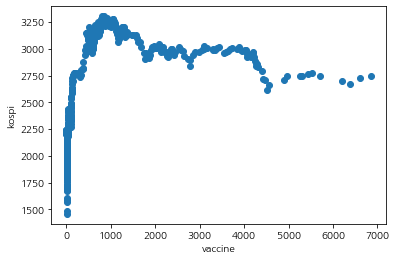

In [56]:
# 시각화
df_covid_count = df_covid['종로구 전체']
df_kospi = df_stock['KOSPI']
plt.scatter(df_covid_count, df_kospi)
plt.xlabel('vaccine')
plt.ylabel('kospi')
plt.show()

# 데이터셋 분류

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# 데이터셋 분류
train_input, test_input, train_target, test_target = train_test_split(
    df_input, df_kospi,  random_state=42)

In [59]:
# 확인용 코드
print(train_input.shape, test_input.shape)
print(train_input.shape, train_target.shape)

(378, 7) (127, 7)
(378, 7) (378,)


## 사이킷런의 변환기

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
# 변환기
poly = PolynomialFeatures(include_bias=False)

# 특성 조합 찾기
poly.fit(train_input)

# 실제 특성 조합 데이터 반환
train_poly = poly.transform(train_input)

In [62]:
# 확인용 코드
print(train_poly.shape)

(378, 35)


In [63]:
# 특성 조합 확인
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x5^2',
 'x5 x6',
 'x6^2']

In [64]:
test_poly = poly.transform(test_input)

In [65]:
# 확인용 코드
print(train_poly.shape)
print(train_target.shape)

(378, 35)
(378,)


## 다중 회귀 모델 훈련하기

In [66]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 선정 & 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 모델 평가
print(lr.score(train_poly, train_target))

0.9107465252027581


In [67]:
# 모델 평가 of 테스트 데이터
print(lr.score(test_poly, test_target))

0.8970695414465529


In [68]:
# 변환기
poly = PolynomialFeatures(degree=5, include_bias=False)

# 특성 조합 찾기
poly.fit(train_input)

# 실제 데이터 반환
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [69]:
print(train_poly.shape)

(378, 791)


In [70]:
# 선형 회귀 모델 훈련
lr.fit(train_poly, train_target)

# 모델 평가
print(lr.score(train_poly, train_target))

0.3505833714965184


In [71]:
# 모델 평가 by 테스트 데이터
print(lr.score(test_poly, test_target))

-27740686424935.914


## 규제

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 특성 스케일 정규화 & 훈련
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지

In [73]:
from sklearn.linear_model import Ridge

# 규제 - 릿지 모델 선정 & 훈련
ridge = Ridge()
ridge.fit(train_scaled, train_target)

# 모델 평가
print(ridge.score(train_scaled, train_target))

0.89419152939702


In [74]:
# 모델 평가 by 테스트 데이터
print(ridge.score(test_scaled, test_target))

0.8893636104356886


In [75]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [76]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 규제 - 릿지 모델 선정 & 훈련
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    
    # 모델평가 저장 + 리스트화
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

C:\Users\Hi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


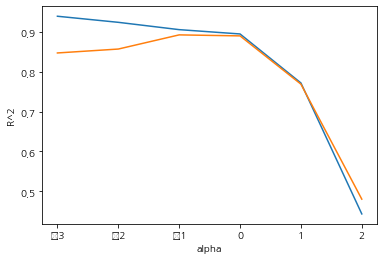

In [77]:
# 시각화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [78]:
# 규제 - 릿지 모델 선정 & 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

# 모델 평가
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9050038698838292
0.8918810298883897


In [79]:
# 결과 예측 by 테스트 데이터
test_ridge_pre = ridge.predict(test_scaled)

# 평균 오차 계산 by 테스트 데이터
mae = mean_absolute_error(test_target, test_ridge_pre)
mse = mean_squared_error(test_target, test_ridge_pre)
rmse = np.sqrt(mse)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))

MAE : 111.817
MSE : 26174.359
RMSE : 161.785


## 라쏘

In [80]:
from sklearn.linear_model import Lasso

# 규제 - 라쏘 모델 선정 & 훈련
lasso = Lasso()
lasso.fit(train_scaled, train_target)

# 모델 평가
print(lasso.score(train_scaled, train_target))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583806.4713230673, tolerance: 8510.560959619048
  model = cd_fast.enet_coordinate_descent(


0.8960596091568845


In [81]:
# 모델 평가 by 테스트 데이터
print(lasso.score(test_scaled, test_target))

0.8915405318686068


In [82]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 규제 - 라쏘 모델 선정 & 훈련
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    
    # 모델평가 저장 + 리스트화
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3775814.169514992, tolerance: 8510.560959619048
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3685898.332333035, tolerance: 8510.560959619048
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1971037.5911789578, tolerance: 8510.560959619048
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objectiv

C:\Users\Hi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


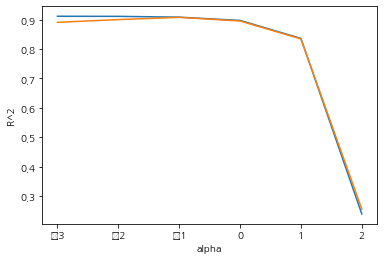

In [83]:
# 시각화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [84]:
# 규제 - 릿지 모델 선정 & 훈련
lasso = Lasso(alpha=0.1)
lasso.fit(train_scaled, train_target)

# 모델 평가
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2818946.989141944, tolerance: 8510.560959619048
  model = cd_fast.enet_coordinate_descent(


0.9001692404043703
0.8948633664912722


In [85]:
# 결과 예측 by 테스트 데이터
test_lasso_pre = lasso.predict(test_scaled)

# 평균 오차 계산 by 테스트 데이터
mae = mean_absolute_error(test_target, test_lasso_pre)
mse = mean_squared_error(test_target, test_lasso_pre)
rmse = np.sqrt(mse)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))

MAE : 114.128
MSE : 25452.370
RMSE : 159.538


In [86]:
# 계수가 0인 특성 출력
print(np.sum(lasso.coef_ == 0))

549


# 시각화

NameError: name 'test_prediction' is not defined

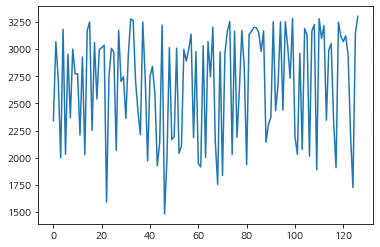

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(test_target)), test_target, '-', label="Original Y")
ax.plot(range(len(test_target)), test_prediction, '-x', label="linear Y")
ax.plot(range(len(test_target)), test_ridge_pre, '-x', label="ridge Y")
ax.plot(range(len(test_target)), test_lasso_pre, '-x', label="lasso Y")
plt.legend(loc='upper right')
plt.xlabel('test_target len')
plt.ylabel('kospi')
plt.show()

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_input.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df_input,figsize=(25, 25))